In [1]:
from funcoes_auxiliares import *

import scipy.stats as stats
import sklearn

import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn import svm as SVM
from sklearn.neural_network import MLPClassifier

pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_rows = 6

In [2]:
lista_estados = ["AC", "AL", "AM", "AP", "BA", "CE", "DF", "ES", "GO", "MA", "MT", "MS", "MG", "PA", "PB", "PR", "PE", "PI", "RJ", "RN", "RO", "RS", "RR", "SC", "SE", "SP", "TO"]

In [3]:
df_estados_brasil = None

In [4]:
for i, estado in enumerate(lista_estados):
    df_despesas = carregar_df_despesas_gerais(estado)
    df_invertido = df_despesas_gerais_invertido(df_despesas, estado)
    if(i == 0):
        df_estados_brasil = df_invertido
    else:
        df_estados_brasil = pd.concat([df_estados_brasil, df_invertido])

In [5]:
df_estados_brasil.reset_index(drop=True, inplace=True)

In [6]:
df_estados_brasil

,Alimentação,Habitação,Aluguel,Aluguel monetário,Aluguel não monetário,Condomínio,Serviços e taxas,Energia elétrica,Telefone fixo,Telefone Celular,...,Imóvel (aquisição),Imóvel (reforma),Outros investimentos,Diminuição do passivo,Empréstimo,Prestação de imóvel,Tamanho médio da família,Total gasto por classes,Estado,Classe social
0,0.12,0.15,0.08,0.00,0.08,0.00,0.04,0.02,0.00,0.01,...,0.00,0.01,-0.00,0.01,0.01,0.00,3.72,1,AC,Até 1908 (2)
1,0.10,0.14,0.07,0.00,0.07,0.00,0.04,0.02,0.00,0.01,...,0.00,0.01,-0.00,0.03,0.03,0.00,4.07,1,AC,Mais de 1908 a 2862
2,0.06,0.12,0.06,0.00,0.06,0.00,0.03,0.01,0.00,0.01,...,0.02,0.02,-0.00,0.04,0.04,0.00,3.99,1,AC,Mais de 2862 a 5724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.05,0.12,0.06,0.01,0.05,-0.00,0.04,0.02,0.00,0.00,...,0.00,0.00,0.00,0.02,0.02,0.01,3.48,1,TO,Mais de 5724 a 9540
160,0.04,0.11,0.04,0.00,0.04,-0.00,0.03,0.01,0.00,0.00,...,-0.00,0.00,-0.00,0.01,0.01,-0.00,3.43,1,TO,Mais de 9540 a 14310
161,0.03,0.11,0.04,0.01,0.03,-0.00,0.02,0.01,-0.00,0.00,...,0.03,0.02,-0.00,0.06,0.04,0.02,3.01,1,TO,Mais de 14310 a 23850


## Análise preditiva

In [7]:
df_estados_brasil.iloc[:, 0:-2] = df_estados_brasil.iloc[:, 0:-2].applymap(lambda item: float(item))

In [8]:
df_estados_brasil

,Alimentação,Habitação,Aluguel,Aluguel monetário,Aluguel não monetário,Condomínio,Serviços e taxas,Energia elétrica,Telefone fixo,Telefone Celular,...,Imóvel (aquisição),Imóvel (reforma),Outros investimentos,Diminuição do passivo,Empréstimo,Prestação de imóvel,Tamanho médio da família,Total gasto por classes,Estado,Classe social
0,0.12,0.15,0.08,0.00,0.08,0.00,0.04,0.02,0.00,0.01,...,0.00,0.01,-0.00,0.01,0.01,0.00,3.72,1.00,AC,Até 1908 (2)
1,0.10,0.14,0.07,0.00,0.07,0.00,0.04,0.02,0.00,0.01,...,0.00,0.01,-0.00,0.03,0.03,0.00,4.07,1.00,AC,Mais de 1908 a 2862
2,0.06,0.12,0.06,0.00,0.06,0.00,0.03,0.01,0.00,0.01,...,0.02,0.02,-0.00,0.04,0.04,0.00,3.99,1.00,AC,Mais de 2862 a 5724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.05,0.12,0.06,0.01,0.05,-0.00,0.04,0.02,0.00,0.00,...,0.00,0.00,0.00,0.02,0.02,0.01,3.48,1.00,TO,Mais de 5724 a 9540
160,0.04,0.11,0.04,0.00,0.04,-0.00,0.03,0.01,0.00,0.00,...,-0.00,0.00,-0.00,0.01,0.01,-0.00,3.43,1.00,TO,Mais de 9540 a 14310
161,0.03,0.11,0.04,0.01,0.03,-0.00,0.02,0.01,-0.00,0.00,...,0.03,0.02,-0.00,0.06,0.04,0.02,3.01,1.00,TO,Mais de 14310 a 23850


### Função que cria modelos de predição e exibe análises

In [9]:
def classifier(X_train,X_test,Y_train,Y_test):
    #Aplicando KNN
    print(" KNN ")
    ini = time.time() #Inicio do calculo do tempo

    knn=KNeighborsClassifier()
    knn.fit(X_train,Y_train)

    end = time.time()
    knn_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,knn.predict(X_test)))
    print()
    
    #Aplicando Naive Bayes
    print("Naive Bayes")
    ini = time.time() #Inicio do calculo do tempo

    nb=BernoulliNB()
    nb.fit(X_train,Y_train)

    end = time.time()
    nb_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,nb.predict(X_test)))
    print()
    
    #Aplicando Arvore de Decisao
    print("Árvore de Decisão")
    ini = time.time() #Inicio do calculo do tempo

    dtc=tree.DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)

    end = time.time()
    dtc_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,dtc.predict(X_test)))

    #Aplicando SVM
    print("SVM")
    ini = time.time() #Inicio do calculo do tempo

    svm = SVM.SVC(kernel='linear', probability=True)
    svm.fit(X_train, Y_train)

    end = time.time()
    svm_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,dtc.predict(X_test)))

    #Aplicando MLP
    print("MLP")
    ini = time.time() #Inicio do calculo do tempo

    mlp = MLPClassifier(alpha=1, max_iter=1000)
    mlp.fit(X_train, Y_train)

    end = time.time()
    mlp_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,dtc.predict(X_test)))

    return knn, nb, dtc, svm, mlp

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(df_estados_brasil.iloc[:, 0:-2],df_estados_brasil['Classe social'], test_size=0.2, random_state=0)

knn, nb, dtc, svm, mlp = classifier(X_train,X_test,Y_train,Y_test)

 KNN 
                       precision    recall  f1-score   support

         Até 1908 (2)       0.75      0.75      0.75         4
Mais de 14310 a 23850       0.60      1.00      0.75         3
  Mais de 1908 a 2862       0.50      1.00      0.67         3
  Mais de 2862 a 5724       0.57      0.44      0.50         9
  Mais de 5724 a 9540       0.57      0.40      0.47        10
 Mais de 9540 a 14310       0.25      0.25      0.25         4

             accuracy                           0.55        33
            macro avg       0.54      0.64      0.56        33
         weighted avg       0.55      0.55      0.53        33


Naive Bayes
                       precision    recall  f1-score   support

         Até 1908 (2)       0.20      0.25      0.22         4
Mais de 14310 a 23850       0.33      0.33      0.33         3
  Mais de 1908 a 2862       0.14      1.00      0.25         3
  Mais de 2862 a 5724       0.00      0.00      0.00         9
  Mais de 5724 a 9540       0.00

### Função para criar matriz de confusão

In [11]:
def plotar_matriz_confusao(classificador, X_test, Y_test):
    
    plt.figure(figsize=(14,7))
    plot_confusion_matrix(classificador, X_test, Y_test, values_format='d')
    plt.xticks(rotation=90)
    plt.show()

### Matriz de confusão do KNN

<Figure size 1008x504 with 0 Axes>

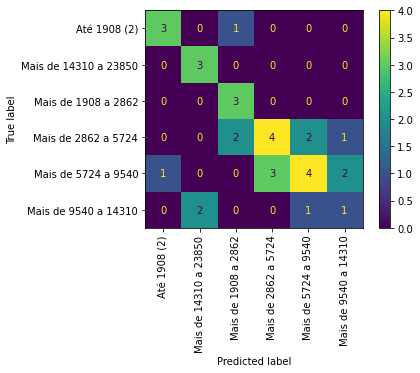

In [12]:
plotar_matriz_confusao(knn, X_test, Y_test)

### Matriz de confusão do Naive Bayes

<Figure size 1008x504 with 0 Axes>

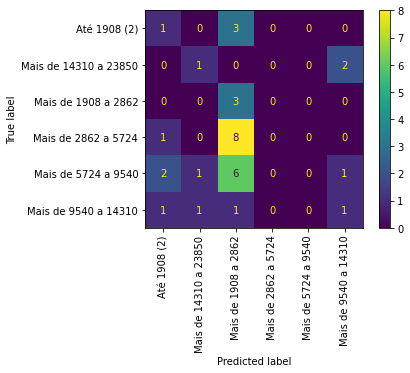

In [13]:
plotar_matriz_confusao(nb, X_test, Y_test)

### Matriz de confusão do Árvore de Decisão

<Figure size 1008x504 with 0 Axes>

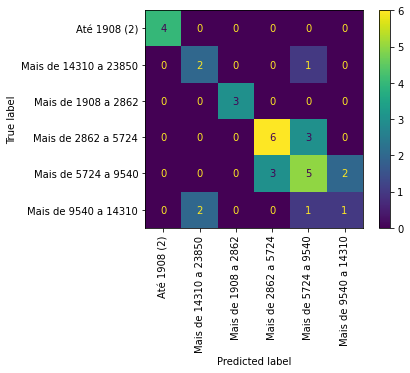

In [14]:
plotar_matriz_confusao(dtc, X_test, Y_test)

### Matriz de confusão do SVM

<Figure size 1008x504 with 0 Axes>

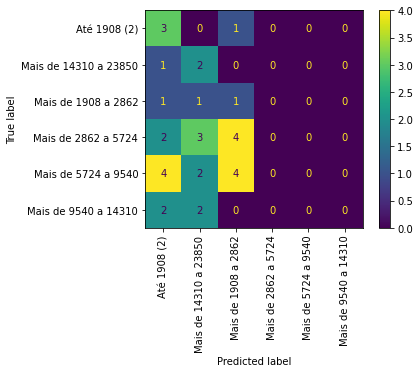

In [15]:
plotar_matriz_confusao(svm, X_test, Y_test)

### Matriz de confusão do MLP

<Figure size 1008x504 with 0 Axes>

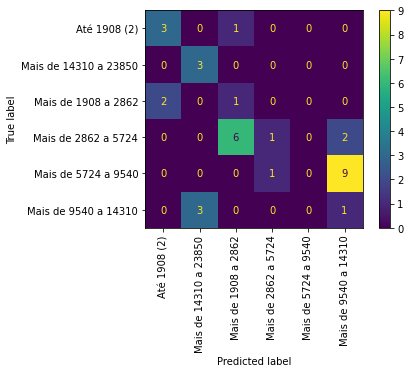

In [16]:
plotar_matriz_confusao(mlp, X_test, Y_test)

# Conclusão

### Podemos verificar então que o modelo de classificação mais interessante foi a "Árvore de decisão", que obteve resultados mais satisfatórios (precisão, revocação e f1-score) junto à sua matriz de confusão para o DF com os dados analisados. Apesar de alguns rótulos obterem 100% de acerto, o que pode ser suspeito.

### Não foi utilizado clusteriazação pois os dados já estavam agrupados por regiões do Brasil. Além disso, também não utilizamos regressão pois possuímos muitas variáveis para análise, o que iria gerar uma equação com aproximadamente 90 termos. Também não achamos viável utilizar o algoritmo "apriori" para relacionar os tipos de consumos pois os dados não estavam divididos para cada família. Dessa forma, os tipos de gastos das famílias ficaram todos misturados e espalhados dentro de cada classe e categoria de compra/serviço.

### Dentre os classificadores, os melhores resultados obtidos foram de 66% de precisão e 68% de revocação para prever a classe social de uma família baseada nos seus hábitos de consumo.